In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm
import requests
import json

In [2]:
projectID = 20055414

In [3]:
def getData(projectID):
    url = 'https://risk-data.azurewebsites.net/api/getdata'
    headers = {"Content-Type": "application/json","x-functions-key":"ZpxuUF5AsKCi3Vee07AFupNv1cek_XA1vNoiPvTNJ8DKAzFuPBqu5A=="}

    json_input = f'''[{projectID}]'''

    response = requests.post(url, data=json_input, headers=headers)
    return (response)

In [4]:
def getPreds(data):
    url = 'https://ironapimgmt.azure-api.net/risk/score'
    api_key = 'b64d98a1124247c6a243ed17613e6ab9' # Replace this with the API key for the web service
    headers = {'Content-Type':'application/json', 'Ocp-Apim-Subscription-Key':api_key}

    responseModel = requests.post(url, data=data, headers=headers)
    print(responseModel)

    return json.loads(responseModel.text)

In [5]:
def plot(projectID, startDate='2021-01-01', endDate='2022-01-01'):
    data = getData(projectID)
    assert data.status_code == 200
    df_all = pd.read_json(data.text)
    print(df_all)
    
    predsOut = getPreds(data.text)
    df = pd.DataFrame(data={"pred_raw":predsOut['predictions']})
    
    df_with_preds = pd.merge(df_all, df,  left_index=True, right_index=True)
    df_with_preds['Date'] = pd.to_datetime(df_with_preds['Date'])  
    mask = (df_with_preds['Date'] > startDate) & (df_with_preds['Date'] <= endDate)
    df_with_preds = df_with_preds.loc[mask]
    
    roll_win = 1

    df_with_preds['pred_raw'] = df_with_preds['pred_raw'].rolling(roll_win, min_periods=1).mean()       

    df_cumulative = df_with_preds.cumsum(axis = 0)

    # Visualize status over time for the selected project
    fig, ax = plt.subplots(figsize = (18, 4))
    # Risk
    ax.plot(df_with_preds['Date'], df_with_preds['pred_raw'], color = 'darkorange', marker = None, zorder = 2, label = 'Predicted Risk Level')
    ax.fill_between(df_with_preds['Date'], 0, df_with_preds['pred_raw'], color='orange', alpha=0.4, zorder=1)
    # Working hours
    ax.plot(df_with_preds['Date'], df_cumulative['est_hours_today']/max(df_cumulative['est_hours_today']), '--', color = 'grey', marker = None, zorder = 5, label='Working Hour Profile')
    ax.legend(loc = 'center right')
    plt.title(f'Predicted Risk - Project Id. {projectID}')
    plt.show()

data = getData(projectID)
assert data.status_code == 200
df_all = pd.read_json(data.text)
predsOut = getPreds(data.text)

df = pd.DataFrame(data={"pred_raw":predsOut['predictions']})

df_with_preds = pd.merge(df_all, df,  left_index=True, right_index=True)




start_date = "2021-01-01"
end_date = "2021-05-01"

df_with_preds['Date'] = pd.to_datetime(df_with_preds['Date'])  

mask = (df_with_preds['Date'] > start_date) & (df_with_preds['Date'] <= end_date)

df_with_preds.loc[mask]

df_with_preds[(df_with_preds['Date'] > pd.to_datetime("2021-01-01") & df_with_preds['Date'] < pd.to_datetime("2021-05-01"))]

roll_win = 1

df_with_preds['pred_raw'] = df_with_preds['pred_raw'].rolling(roll_win, min_periods=1).mean()       

df_cumulative = df_with_preds.cumsum(axis = 0)

# Visualize status over time for the selected project
fig, ax = plt.subplots(figsize = (18, 4))
# Risk
ax.plot(df_with_preds['Date'], df_with_preds['pred_raw'], color = 'darkorange', marker = None, zorder = 2, label = 'Predicted Risk Level')
ax.fill_between(df_with_preds['Date'], 0, df_with_preds['pred_raw'], color='orange', alpha=0.4, zorder=1)
# Working hours
ax.plot(df_with_preds['Date'], df_cumulative['est_hours_today']/max(df_cumulative['est_hours_today']), '--', color = 'grey', marker = None, zorder = 5, label='Working Hour Profile')
ax.legend(loc = 'center right')
plt.title(f'Predicted Risk - Project Id. {projectID}')
plt.show()

<Response [200]>


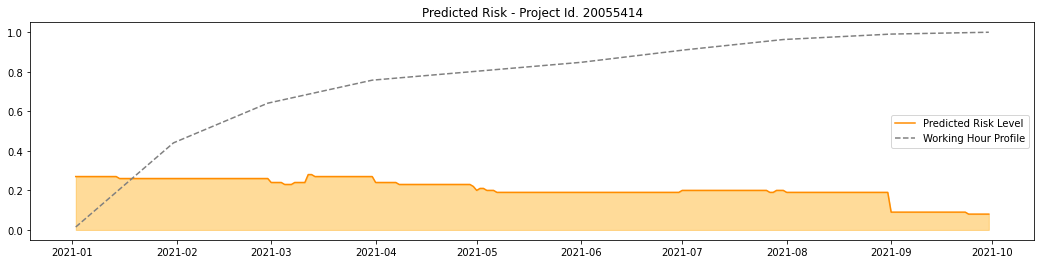

In [6]:
plot(projectID)

In [6]:
data = getData(projectID)

In [11]:
import pprint

In [13]:
pprint.pprint(data.text)

('{"Date": ["2016-01-01", "2016-01-02", "2016-01-03", "2016-01-04", '
 '"2016-01-05", "2016-01-06", "2016-01-07", "2016-01-08", "2016-01-09", '
 '"2016-01-10", "2016-01-11", "2016-01-12", "2016-01-13", "2016-01-14", '
 '"2016-01-15", "2016-01-16", "2016-01-17", "2016-01-18", "2016-01-19", '
 '"2016-01-20", "2016-01-21", "2016-01-22", "2016-01-23", "2016-01-24", '
 '"2016-01-25", "2016-01-26", "2016-01-27", "2016-01-28", "2016-01-29", '
 '"2016-01-30", "2016-01-31", "2016-02-01", "2016-02-02", "2016-02-03", '
 '"2016-02-04", "2016-02-05", "2016-02-06", "2016-02-07", "2016-02-08", '
 '"2016-02-09", "2016-02-10", "2016-02-11", "2016-02-12", "2016-02-13", '
 '"2016-02-14", "2016-02-15", "2016-02-16", "2016-02-17", "2016-02-18", '
 '"2016-02-19", "2016-02-20", "2016-02-21", "2016-02-22", "2016-02-23", '
 '"2016-02-24", "2016-02-25", "2016-02-26", "2016-02-27", "2016-02-28", '
 '"2016-02-29", "2016-03-01", "2016-03-02", "2016-03-03", "2016-03-04", '
 '"2016-03-05", "2016-03-06", "2016-03-07"

 '0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, '
 '1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, '
 '0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, '
 '1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, '
 '1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, '
 '1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, '
 '1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, '
 '0, 0, 1, 1, 1, 1], "cos_month": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, '
 '1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, '
 '1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8660254037844387, '
 '0.8660254037844387, 0.8660254037844387, 0.8660254037844387, '
 '0.8660254037844387, 0.8660254037844387, 0.8660254037844387, '
 '0.8660254037844387, 0.8660254037844387, 0.8660254037844387, '
 '0.8660254037844387, 0.86602540378

 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 1.0, 0.857142857142857, 0.7142857142857142, 0.5714285714285714, '
 '0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 1.0, 0.857142857142857, 0.7142857142857142, 0.5714285714285714, '
 '0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '
 '0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, '
 '1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, '
 '1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

 '0.0027979854504756574, 0.002796420581655481, 0.002794857462269424, '
 '0.002793296089385475, 0.0027917364600781687, 0.0027901785714285715, '
 '0.002788622420524261, 0.002787068004459309, 0.002785515320334262, '
 '0.0027839643652561247, 0.0027824151363383415, 0.0027808676307007787, '
 '0.0027793218454697055, 0.002777777777777778, 0.00277623542476402, '
 '0.002774694783573807, 0.0027731558513588465, 0.002771618625277162, '
 '0.002770083102493075, 0.0027685492801771874, 0.002767017155506364, '
 '0.0027654867256637168, 0.002763957987838585, 0.0027624309392265192, '
 '0.0027609055770292656, 0.0027593818984547464, 0.0027578599007170436, '
 '0.0027563395810363835, 0.0027548209366391185, 0.0027533039647577094, '
 '0.00275178866263071, 0.0027502750275027505, 0.002748763056624519, '
 '0.0027472527472527475, 0.0027457440966501922, 0.0027442371020856204, '
 '0.0027427317608337905, 0.0027412280701754384, 0.0027397260273972603, '
 '0.002738225629791895, 0.002736726874657909, 0.002735229759299781, 

In [7]:
pd.read_json(data.text)

,Date,est_hours_today,days_in_month,weekends_in_month,est_hours_before,hours_inc_monthly_lag,days_passed,working,cos_month,sin_month,...,i_small_days_since_last,i_medium_days_since_last,i_severe_days_since_last,PosObsCount_days_since_last,NegObsCount_days_since_last,i_total_days_since_last,i_total_all_days_since_last,inc_texts,pos_texts,neg_texts
0,2016-01-01,176.709677,31,10,NaN,NaN,0,1,1.0,0.000000,...,-1,-1,-1,-1,-1,-1,-1,[],[],[]
1,2016-01-02,176.709677,31,10,NaN,NaN,1,0,1.0,0.000000,...,-1,-1,-1,-1,-1,-1,-1,[],[],[]
2,2016-01-03,176.709677,31,10,NaN,NaN,2,0,1.0,0.000000,...,-1,-1,-1,-1,-1,-1,-1,[],[],[]
3,2016-01-04,176.709677,31,10,NaN,NaN,3,1,1.0,0.000000,...,-1,-1,-1,-1,-1,-1,-1,[],[],[]
4,2016-01-05,176.709677,31,10,NaN,NaN,4,1,1.0,0.000000,...,-1,-1,-1,-1,-1,-1,-1,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2021-09-26,3.250000,30,8,8.887097,-286.25,2095,0,-0.5,-0.866025,...,943,-1,-1,1620,1620,943,199,[],[],[]
2096,2021-09-27,3.250000,30,8,8.887097,-286.25,2096,1,-0.5,-0.866025,...,944,-1,-1,1621,1621,944,200,[],[],[]
2097,2021-09-28,3.250000,30,8,8.887097,-286.25,2097,1,-0.5,-0.866025,...,945,-1,-1,1622,1622,945,201,[],[],[]
2098,2021-09-29,3.250000,30,8,8.887097,-286.25,2098,1,-0.5,-0.866025,...,946,-1,-1,1623,1623,946,202,[],[],[]


In [14]:
predsOut = getPreds(data.text)
df = pd.DataFrame(data={"pred_raw":predsOut['predictions']})
df

<Response [200]>


,pred_raw
0,0.34
1,0.34
2,0.34
3,0.34
4,0.34
...,...
2095,0.08
2096,0.08
2097,0.08
2098,0.08
